In [27]:
import torch
import numpy as np

# import helper
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

### Importing the MNIST dataset

In [2]:
from torchvision import datasets, transforms

# Normalixing the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                               ])

# Downloading the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=64)

In [3]:
detaiter = iter(trainloader)
images, labels = detaiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


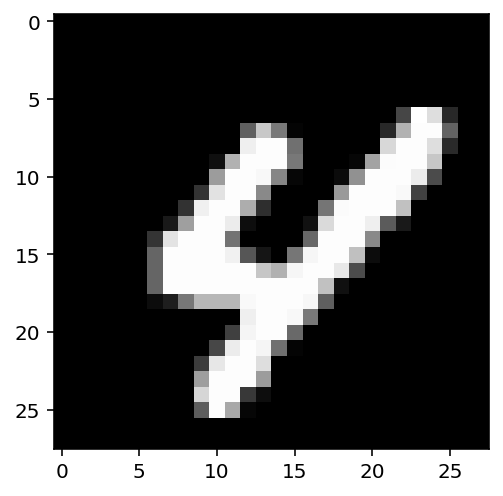

In [4]:
plt.imshow(images[1].numpy().squeeze(), cmap='gray')

In [5]:
# Activation function
def sigmoid(x):
    return 1/(1+torch.exp(-x))

# Flattening the images
img = images.view(images.shape[0], -1)

# Initializing the network parameters
n_input = img.shape[-1]
n_hidden = 256
n_output = 10

# Initializing the weights
W1 = torch.randn((n_input, n_hidden))
W2 = torch.randn((n_hidden, n_output))

# Initializing the Biases
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

h = sigmoid(torch.mm(img, W1) + B1)
out = torch.mm(h, W2) + B2
out.shape

torch.Size([64, 10])

### implementing the softmax function

In [6]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

prob = softmax(out)

print(prob.shape)
print(torch.sum(prob, dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


### Using nn module

In [7]:
from torch import nn

In [8]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
#         layers
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
#         Activations
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
#     feed-forward network
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [9]:
# Instantiating the model
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

### using torch.nn.functional

In [10]:
import torch.nn.functional as F

In [13]:
class Network():
    def __init__(self):
        super().__init__()
        
#         layers
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
#         No need for defining activations separately
    
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.hidden(x), dim=1)
        
        return x

In [14]:
model = Network()
model

### multiple hidden layers

In [15]:
class MultiNetwork():
    def __init__(self):
        super().__init__()
        
        self.h1 = nn.Linear(784, 128)
        self.h2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.h1(x))
        x = F.relu(self.h2(x))
        x = F.softmax(self.output(x), dim=1)
        
        return x

model = MultiNetwork()
model

### initializing the weights and biases

In [16]:
# print weights and biases
print(model.h1.weight)
print(model.h1.bias)

Parameter containing:
tensor([[ 0.0077, -0.0184,  0.0074,  ...,  0.0339,  0.0134, -0.0223],
        [-0.0317,  0.0030,  0.0131,  ..., -0.0340,  0.0013,  0.0010],
        [-0.0225, -0.0131,  0.0140,  ...,  0.0084, -0.0352,  0.0013],
        ...,
        [ 0.0180,  0.0279,  0.0241,  ..., -0.0120,  0.0193, -0.0282],
        [-0.0259,  0.0141, -0.0159,  ..., -0.0215,  0.0193,  0.0222],
        [ 0.0151, -0.0058,  0.0117,  ..., -0.0343,  0.0273, -0.0004]],
       requires_grad=True)
Parameter containing:
tensor([-0.0295, -0.0165,  0.0026, -0.0333, -0.0123,  0.0266, -0.0348,  0.0346,
         0.0322,  0.0300, -0.0087, -0.0336,  0.0067, -0.0295,  0.0209, -0.0262,
        -0.0188, -0.0092, -0.0199, -0.0047, -0.0022, -0.0263, -0.0029,  0.0231,
         0.0210,  0.0207,  0.0046,  0.0203,  0.0127, -0.0061,  0.0296,  0.0010,
         0.0181,  0.0325,  0.0061,  0.0331, -0.0025, -0.0126,  0.0018, -0.0228,
         0.0113, -0.0329,  0.0274,  0.0083,  0.0239, -0.0155, -0.0297, -0.0062,
        -0.0064

In [18]:
# setting biases to all zeros
model.h1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
# setting weights with normal distribution distribution having std dev=0.01
model.h1.weight.data.normal_(std=0.01)

tensor([[-0.0019,  0.0123,  0.0213,  ..., -0.0051, -0.0023,  0.0083],
        [ 0.0117, -0.0119, -0.0055,  ...,  0.0033,  0.0179, -0.0029],
        [-0.0014, -0.0147, -0.0021,  ..., -0.0056, -0.0263,  0.0018],
        ...,
        [-0.0020, -0.0005, -0.0061,  ..., -0.0031, -0.0090,  0.0056],
        [-0.0170, -0.0139,  0.0013,  ..., -0.0052,  0.0057, -0.0279],
        [-0.0226,  0.0135, -0.0109,  ..., -0.0015, -0.0030, -0.0140]])

### forward pass with an image

In [30]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

images.resize_(64, 1, 784)

img_idx = 0
ps = model.forward(images[img_idx,:])

ps

tensor([[0.1089, 0.0970, 0.1031, 0.0975, 0.1059, 0.0962, 0.0944, 0.0868, 0.1009,
         0.1094]], grad_fn=<SoftmaxBackward>)

### using nn.Sequential() for building sequential models

In [32]:
input_size = 784
hidden_size = [128, 64]
output_size = 10

# building a feed forward network
model = nn.Sequential(nn.Linear(input_size, hidden_size[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[0], hidden_size[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[1], output_size),
                      nn.Softmax(dim=1)
                     )

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [34]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0231, -0.0056, -0.0340,  ..., -0.0065, -0.0165, -0.0207],
        [ 0.0017, -0.0262, -0.0172,  ..., -0.0327,  0.0113,  0.0185],
        [-0.0214,  0.0243, -0.0074,  ..., -0.0063, -0.0090,  0.0182],
        ...,
        [ 0.0198,  0.0243,  0.0246,  ...,  0.0267, -0.0134,  0.0128],
        [-0.0016,  0.0147,  0.0162,  ..., -0.0159, -0.0132,  0.0175],
        [-0.0106, -0.0130,  0.0343,  ..., -0.0052, -0.0342, -0.0124]],
       requires_grad=True)

### using Ordered Dictionary for creating the sequential model

In [43]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                    ('fc1', nn.Linear(input_size, hidden_size[0])),
                    ('relu1', nn.ReLU()),
                    ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
                    ('relu2', nn.ReLU()),
                    ('output', nn.Linear(hidden_size[1], output_size)),
                    ('softmax', nn.Softmax(dim=1))
]))

model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)